In [10]:
import numpy as np
import matplotlib.pyplot as plt
from CAMB import camb
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [12]:
p = np.loadtxt('MCMC_results_params.txt')
chi = np.loadtxt('MCMC_results_chi.txt')
chain = np.loadtxt('MCMC_results_chain.txt')
wmap = np.loadtxt('Intensity.txt')

In [8]:
#Copied the spectrum function written by Prof. Sievers
def get_spectrum(pars,lmax=2000,fixed_Tau=None):
    if fixed_Tau is None:
        H0=pars[0]
        ombh2=pars[1]
        omch2=pars[2]
        tau=pars[3]
        As=pars[4]
        ns=pars[5]
    else: 
        H0=pars[0]
        ombh2=pars[1]
        omch2=pars[2]
        tau=fixed_Tau
        As=pars[3]
        ns=pars[4]
    pars=camb.CAMBparams()
    pars.set_cosmology(H0=H0,ombh2=ombh2,omch2=omch2,mnu=0.06,omk=0,tau=tau)
    pars.InitPower.set_params(As=As,ns=ns,r=0)
    pars.set_for_lmax(lmax,lens_potential_accuracy=0)
    results=camb.get_results(pars)
    powers=results.get_cmb_power_spectra(pars,CMB_unit='muK')
    cmb=powers['total']
    tt=cmb[:,0]    #you could return the full power spectrum here if you wanted to do say EE
    return tt

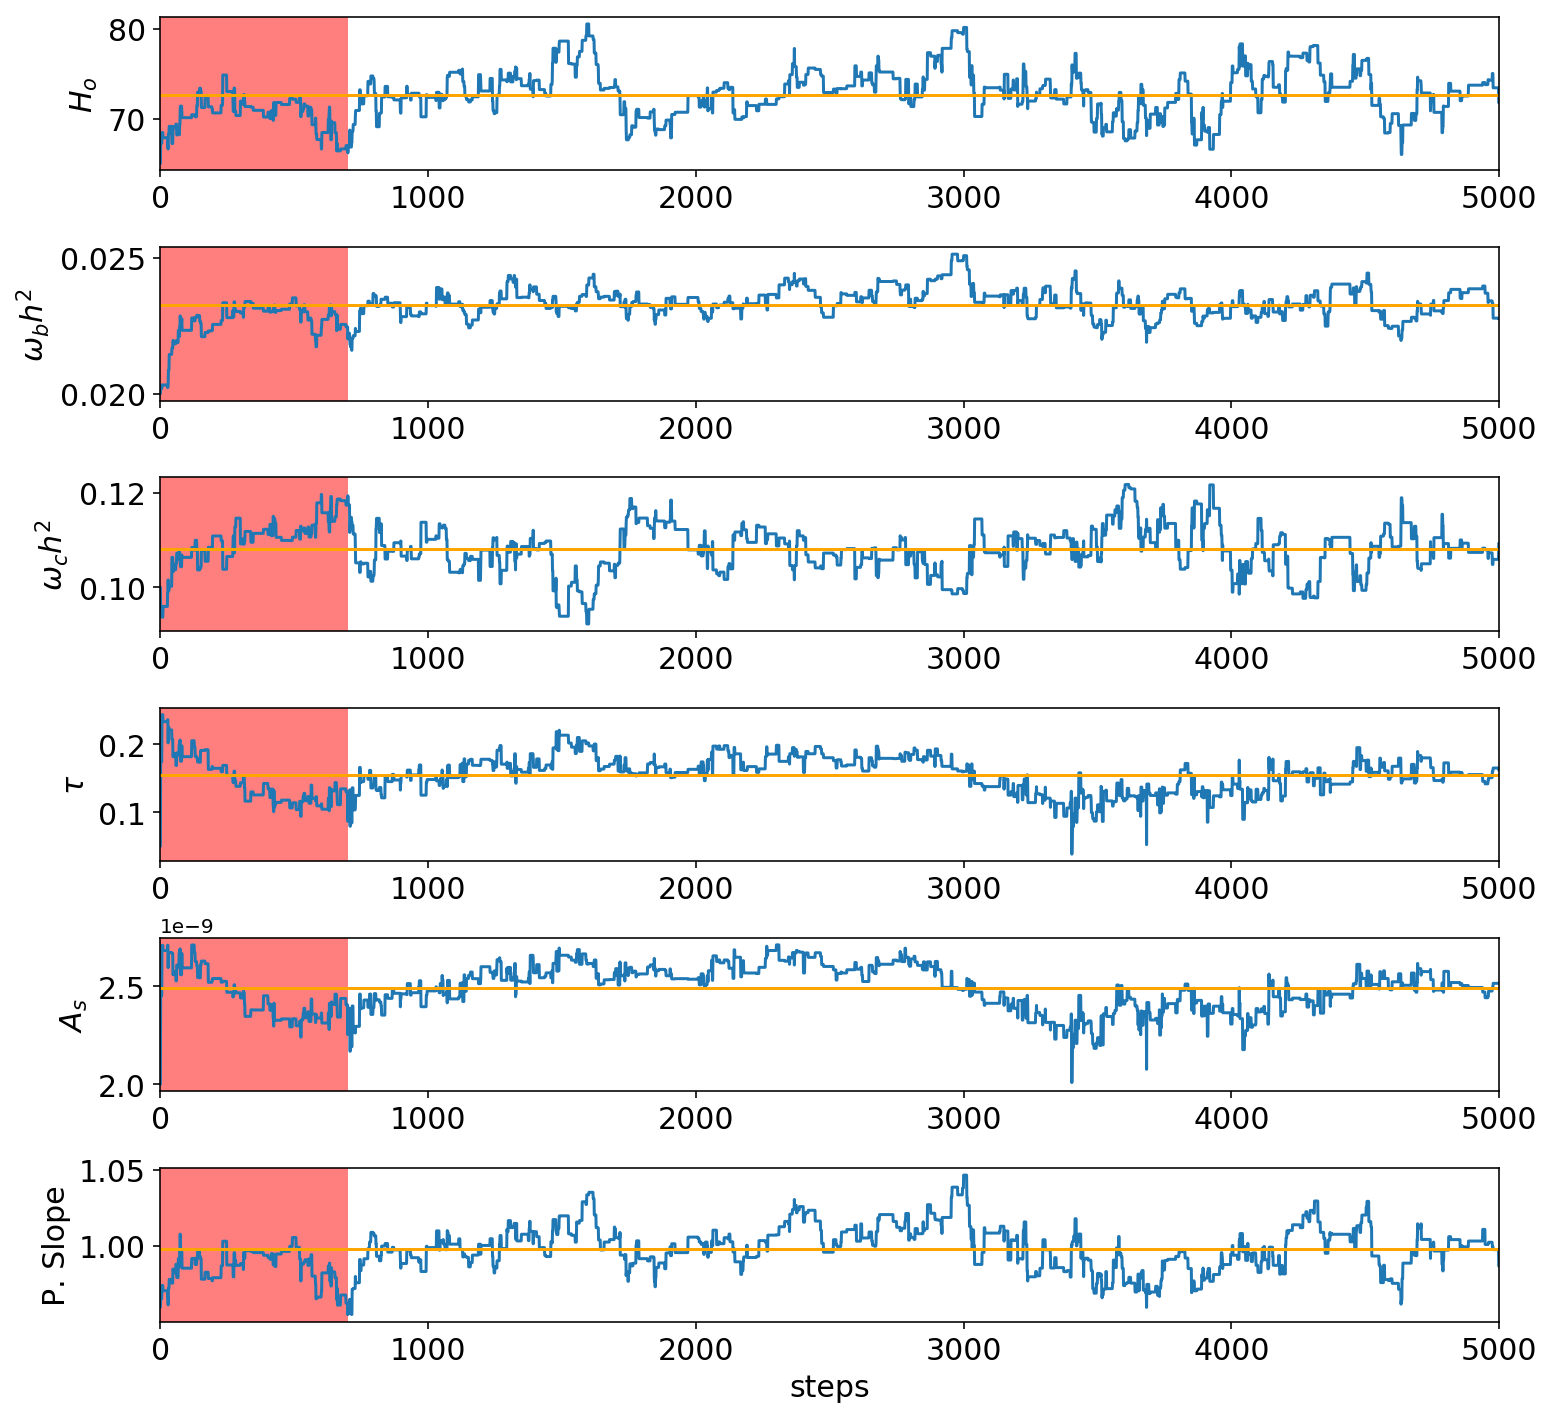

In [4]:
fig = plt.figure(figsize=(12,12))
burnin = 700
mean_params = []
error_params = []
labels = [r"$H_o$",r"$\omega_b h^2$",r"$\omega_c h^2$",r"$\tau$",r"$A_s$","P. Slope"]
for i in range(len(p)):
    ax = fig.add_subplot(len(p),1,i+1)
    fig.subplots_adjust(hspace=.5)
    ax.plot(chain[:,i])
    ax.set_ylabel(f"{labels[i]}",fontsize=15)
    ax.axvspan(0,burnin,facecolor='r',alpha=0.5)
    ax.tick_params(labelsize=15)
    ax.set_xlim(0,5000)
    ax.axhline(np.mean(chain[:,i]),color='orange')
    mean_params.append(np.mean(chain[:,i]))
    error_params.append(np.std(chain[:,i]))
    if i==len(p)-1:
        ax.set_xlabel("steps",fontsize=15)

In [5]:
print (mean_params)
print (error_params)

[72.63581166299666, 0.02328013465107142, 0.10812330601496642, 0.15438966900713322, 2.4902516191296624e-09, 0.9978022396534718]
[2.6630743390514784, 0.0005971820995404526, 0.005030988968272959, 0.026812774003393738, 1.1181393575662133e-10, 0.014690623853980013]


The mean $H_o$ is $73\pm2$

The mean $\omega_b h^2$ is $0.0233\pm0.0006$

The mean $\omega_c h^2$ is $0.108\pm0.005$

The mean $\tau$ is $0.15\pm0.02$

The mean $A_s$ is $(2.5\pm0.1)\times10^{-9}$

The mean P. Slope is $0.99\pm0.01$

Now, let us draw the $\chi^2$ to see if the chain converged or not

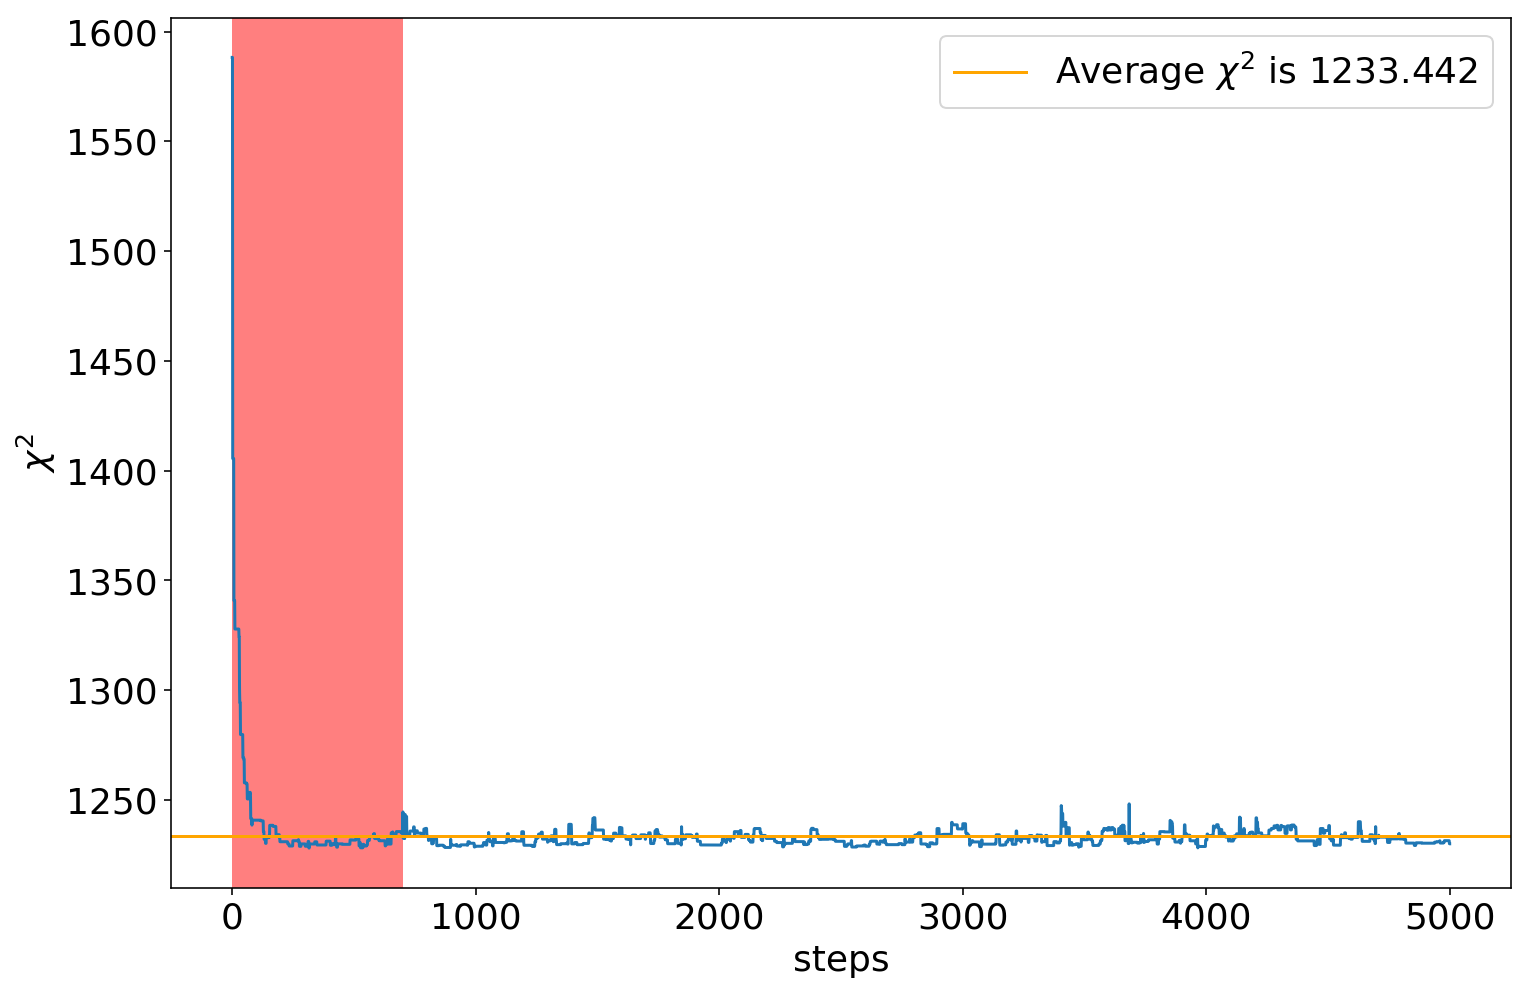

In [6]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(chi)
ax.set_xlabel("steps",fontsize=18)
ax.set_ylabel(r"$\chi^2$",fontsize=18)
ax.tick_params(labelsize=18)
ax.axhline(np.mean(chi),color='orange',label=r'Average $\chi^2$ is {}'.format(np.round(np.mean(chi),3)))
ax.axvspan(0,burnin,facecolor='r',alpha=0.5)
plt.legend(fontsize=18)

I think the chain has converged because if we look at the above $\chi^2$ values, outside the burning period, they seem to stabilize around a average value of 1233.4. This suggests a convergence of the chain.

Morever, looking at the parameters in the figure before that, we see that the chain does indeed coverge to a value after the burning period. 

Finally, we can plot the fit with the parameters found to compare and contrast the fits

Text(0.5, 0, 'Index')

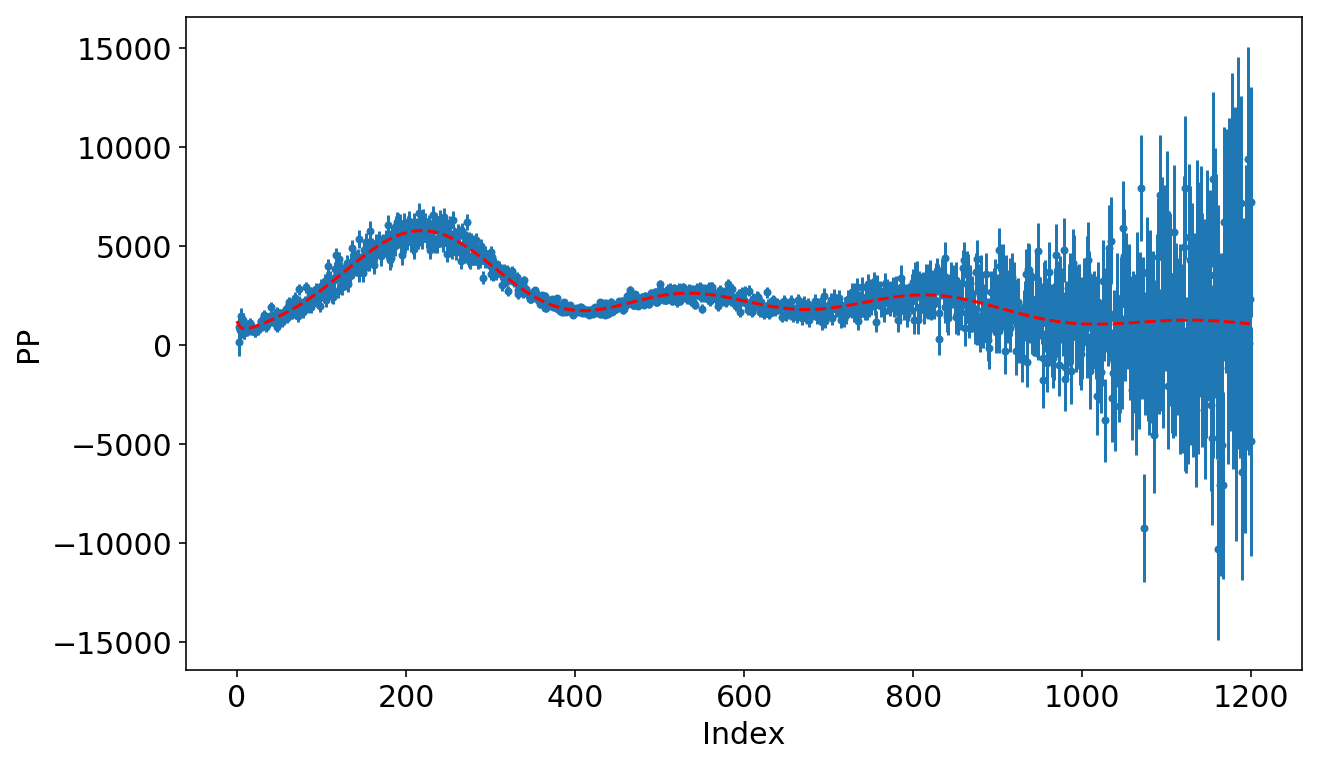

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
y = get_spectrum(mean_params)[2:len(wmap[:,1])+2]
ax.plot(y,'--',color='red')
ax.errorbar(wmap[:,0],wmap[:,1],yerr=wmap[:,2],fmt='.',zorder=1)
ax.tick_params(labelsize=15)
ax.set_ylabel("PP",fontsize=15)
ax.set_xlabel("Index",fontsize=15)

Fits looks pretty good, gets my approval... The errors on each parameter tend to increase from question 2.